<a href="https://colab.research.google.com/github/drcrajc/statsassignmentcodes/blob/main/Stats_Assignment_code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

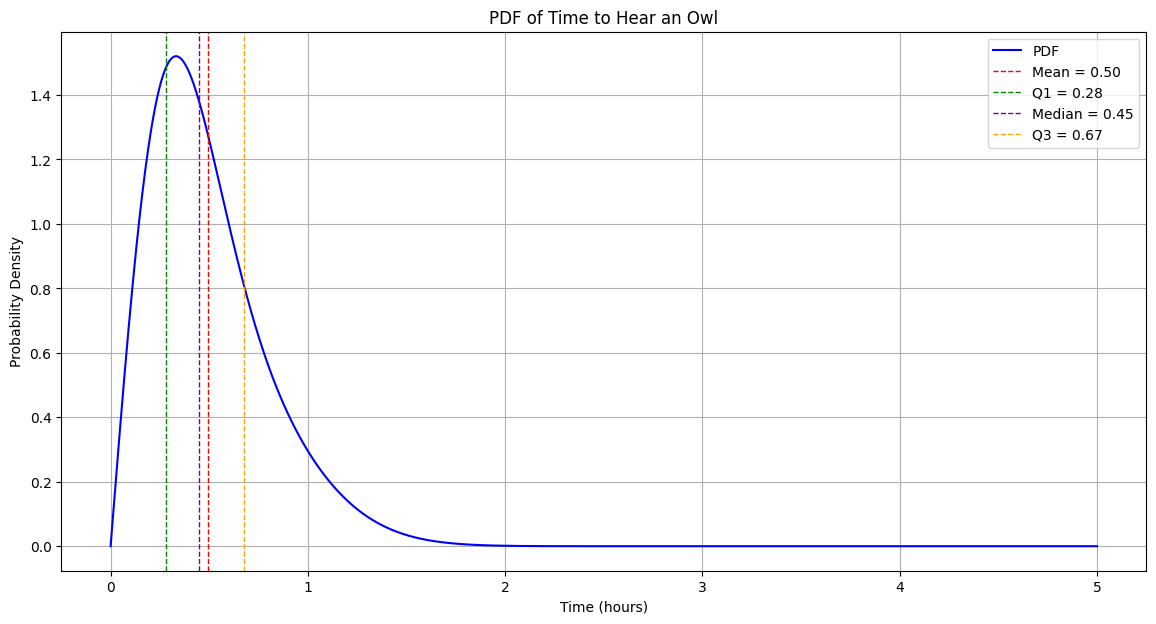

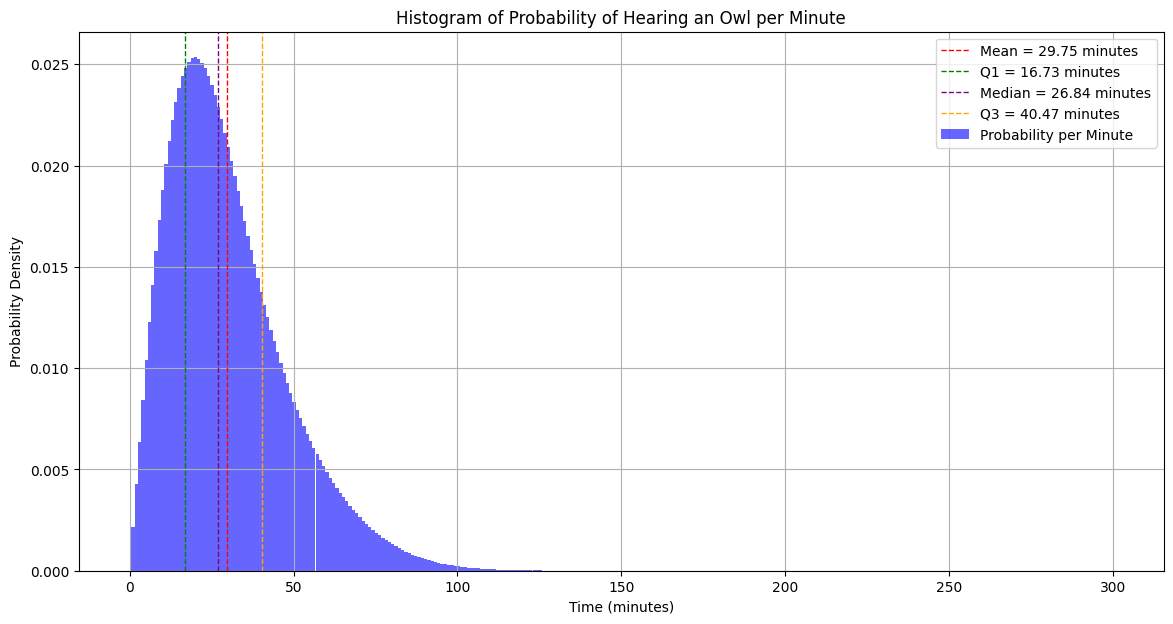

(0.0001744405842458532,
 0.49590797052322294,
 0.09240861810487155,
 0.27876556749611714,
 0.44730592453502377,
 0.6744946388862446)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root_scalar

# Define the PDF derived from the survival function
def pdf(y):
    return 2.08 * y * np.exp(-2 * y**2) + 5.64 * y * np.exp(-6 * y**2)

# Probability between 2 and 4 hours
prob_between_2_and_4, _ = quad(pdf, 2, 4)

# Mean of the distribution
mean, _ = quad(lambda y: y * pdf(y), 0, np.inf)

# Variance of the distribution
second_moment, _ = quad(lambda y: y**2 * pdf(y), 0, np.inf)
variance = second_moment - mean**2

# Function to find quartiles
def cdf(y):
    return quad(pdf, 0, y)[0]

def find_quantile(q):
    return root_scalar(lambda y: cdf(y) - q, bracket=[0, 10]).root

# Calculate quartiles
q1 = find_quantile(0.25)
median = find_quantile(0.5)
q3 = find_quantile(0.75)

# Generate data for plotting the PDF
y_values = np.linspace(0, 5, 1000)
pdf_values = pdf(y_values)

# Plot PDF
plt.figure(figsize=(14, 7))
plt.plot(y_values, pdf_values, label='PDF', color='blue')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
plt.axvline(q1, color='green', linestyle='dashed', linewidth=1, label=f'Q1 = {q1:.2f}')
plt.axvline(median, color='purple', linestyle='dashed', linewidth=1, label=f'Median = {median:.2f}')
plt.axvline(q3, color='orange', linestyle='dashed', linewidth=1, label=f'Q3 = {q3:.2f}')
plt.xlabel('Time (hours)')
plt.ylabel('Probability Density')
plt.title('PDF of Time to Hear an Owl')
plt.legend()
plt.grid(True)

# Create histogram data (each bar represents the probability of hearing the owl at any particular minute)
minute_values = np.linspace(0, 5, 300)
minute_pdf_values = pdf(minute_values) / 60  # Convert from hours to minutes

# Plot histogram
plt.figure(figsize=(14, 7))
plt.bar(minute_values * 60, minute_pdf_values, width=1, color='blue', alpha=0.6, label='Probability per Minute')
plt.axvline(mean * 60, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean * 60:.2f} minutes')
plt.axvline(q1 * 60, color='green', linestyle='dashed', linewidth=1, label=f'Q1 = {q1 * 60:.2f} minutes')
plt.axvline(median * 60, color='purple', linestyle='dashed', linewidth=1, label=f'Median = {median * 60:.2f} minutes')
plt.axvline(q3 * 60, color='orange', linestyle='dashed', linewidth=1, label=f'Q3 = {q3 * 60:.2f} minutes')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Histogram of Probability of Hearing an Owl per Minute')
plt.legend()
plt.grid(True)

# Show plots
plt.show()

(prob_between_2_and_4, mean, variance, q1, median, q3)
